In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

#SKLearn stuff
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OrdinalEncoder

warnings.filterwarnings('ignore')

In [161]:
df = pd.read_csv('data/kc_house_data.csv')

# Header cleaning. More precautionary than anything else
df.columns = [x.strip().lower().replace(' ','').replace('-','') for x in df.columns]
df.drop(columns = ['id'],inplace = True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [163]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [164]:
# Removing outliers
df = df[df['bedrooms'] <=15] #Only 1 record remove. 33 Bed, 1.75 Bath?

sqft_basement is an object?

In [165]:
df.sqft_basement.sort_values()

0        0.0
12644    0.0
12645    0.0
12646    0.0
12648    0.0
        ... 
2126       ?
8548       ?
4776       ?
15185      ?
8565       ?
Name: sqft_basement, Length: 21596, dtype: object

sqft_basement is a list of strings that include some unknowns marked as '?'

In [166]:
df_subset_basement = df[df.sqft_basement !='?'] #drop records where sqft_basement is not '?'
df_subset_basement.sqft_basement = df_subset_basement.sqft_basement.astype(float,)

In [167]:
#check to see how much of the current sqft_basement (excluding '?') can be explained by (sqft_living-sqft_above)

(df_subset_basement.sqft_living - df_subset_basement.sqft_above == df_subset_basement.sqft_basement).sum()/df_subset_basement.shape[0]

1.0

turns out 100%. Fill na using this math

In [168]:
df['sqft_basement'] = df['sqft_living'] - df['sqft_above']

In [169]:
# Change view rating to a numeric value. Probably don't need it
df['view'] = df['view'].map({'EXCELLENT':5,
                             'GOOD':4,
                             'AVERAGE':3,
                             'FAIR':2,
                             'NONE':1})

# Change condition rating to a numeric value. Probably don't need it
df['condition'] = df['condition'].map({'Very Good':5,
                                       'Good':4,
                                       'Average':3,
                                       'Fair':2,
                                       'Poor':1})

# Changing grade to just the numeric value of the grade
df['grade'] = df['grade'].str.split(' ').str[0].astype(int)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21596 non-null  object 
 1   price          21596 non-null  float64
 2   bedrooms       21596 non-null  int64  
 3   bathrooms      21596 non-null  float64
 4   sqft_living    21596 non-null  int64  
 5   sqft_lot       21596 non-null  int64  
 6   floors         21596 non-null  float64
 7   waterfront     19220 non-null  object 
 8   view           21533 non-null  float64
 9   condition      21596 non-null  int64  
 10  grade          21596 non-null  int32  
 11  sqft_above     21596 non-null  int64  
 12  sqft_basement  21596 non-null  int64  
 13  yr_built       21596 non-null  int64  
 14  yr_renovated   17754 non-null  float64
 15  zipcode        21596 non-null  int64  
 16  lat            21596 non-null  float64
 17  long           21596 non-null  float64
 18  sqft_l

In [171]:
#The number of records where view is nan is 0.29% of the dataset. Hence dropped
print(df.view.isna().sum() /df.shape[0])
df.dropna(subset=['view'],inplace=True)

0.0029172068901648454


In [172]:
df.corr().price.sort_values()

zipcode         -0.053626
long             0.022428
condition        0.035367
yr_built         0.054284
sqft_lot15       0.083194
sqft_lot         0.090341
yr_renovated     0.129890
floors           0.257069
lat              0.307863
bedrooms         0.315236
sqft_basement    0.321812
view             0.395739
bathrooms        0.525063
sqft_living15    0.585329
sqft_above       0.605719
grade            0.668320
sqft_living      0.701599
price            1.000000
Name: price, dtype: float64

dropping yr_renovated,floors,yr_built

In [173]:
df = df.drop(columns = ['yr_renovated','yr_built','floors','date'],axis =1)

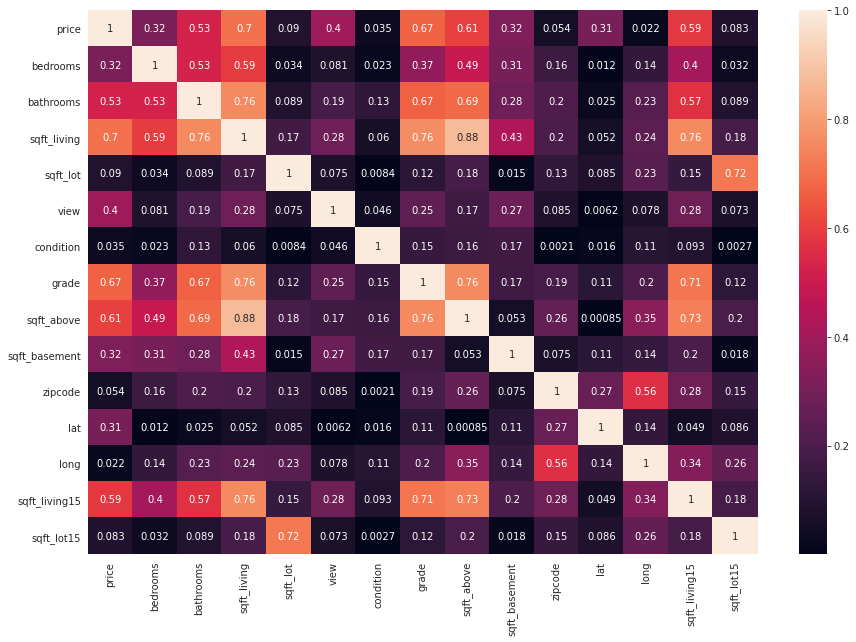

In [174]:
# sns.heatmap(df.corr(),annot=True)

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(abs(df.corr()),annot=True)

Note the corelation between
- sqft_living and sqft_above (because sqft_living = sqft_above + sqft_basement). In fact a lot of the sqft are highly corelated
    - try feature engineering between them, or just pick 1 or 2
- grade to sqft_living15, sqft_above
- bathrooms to grade
- grade and sqft_living has highest impact on target (price)

### Running IQR on a few of these columns
Namely: bedrooms, bathrooms, all sqft

In [175]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.153300e+04,21533.000000,21533.000000,21533.000000,2.153300e+04,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000
mean,5.400530e+05,3.371662,2.115729,2079.849208,1.509102e+04,1.233874,3.409650,7.657456,1788.592300,291.256908,98077.938188,47.560174,-122.213943,1986.330423,12751.453397
std,3.660674e+05,0.904162,0.768616,917.462472,4.138112e+04,0.765702,0.650579,1.172661,827.749142,442.205716,53.507609,0.138529,0.140736,685.122310,27256.060980
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1.000000,3.000000,370.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,3.000000,7.000000,1190.000000,0.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.000000,3.000000,7.000000,1560.000000,0.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,1.000000,4.000000,8.000000,2210.000000,560.000000,98118.000000,47.678100,-122.125000,2360.000000,10083.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,5.000000,5.000000,13.000000,9410.000000,4820.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [176]:
df.sqft_lot.describe()

count    2.153300e+04
mean     1.509102e+04
std      4.138112e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.617000e+03
75%      1.068800e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

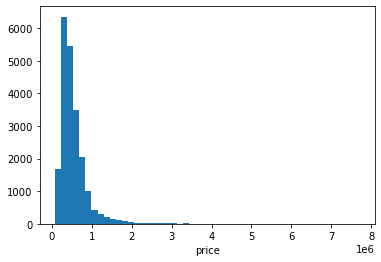

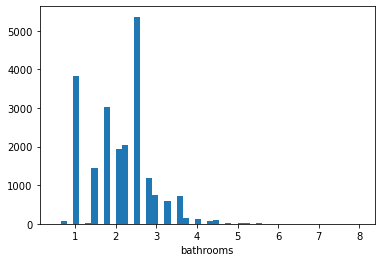

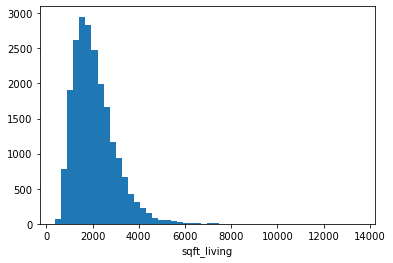

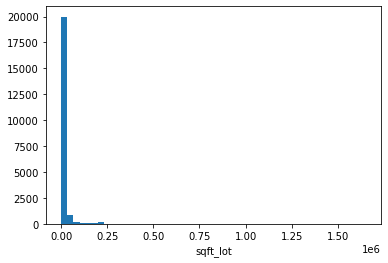

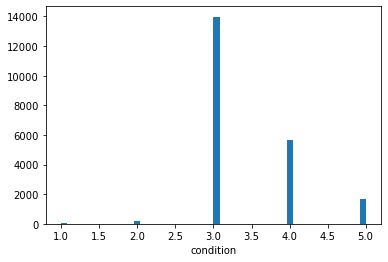

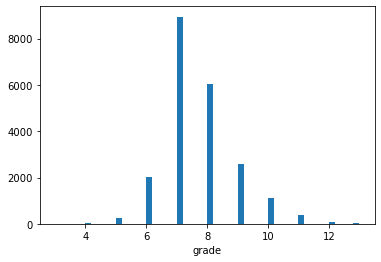

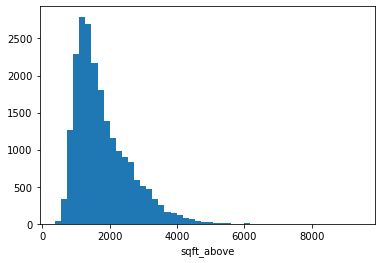

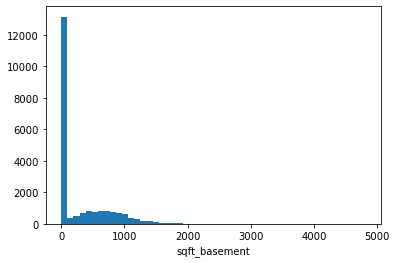

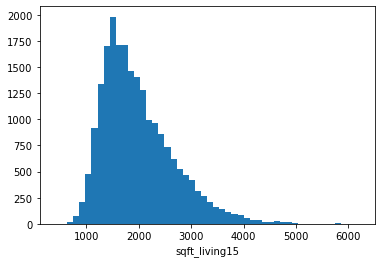

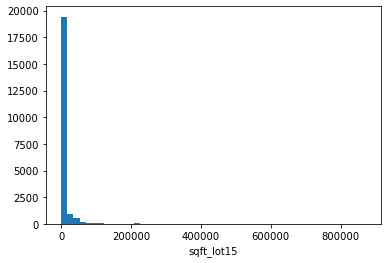

In [177]:
for c in ['price', 
          'bathrooms', 
          'sqft_living', 
          'sqft_lot',
          'condition', 
          'grade', 
          'sqft_above',
          'sqft_basement', 
          'sqft_living15',
          'sqft_lot15']:
    fig,ax = plt.subplots()
    ax.hist(df[c],bins=50)
    ax.set_xlabel(c)

In [178]:
def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
 
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    print("IQR value for column %s is %s with a lower range of %s and an upper range of %s" % (col, 
                                                                                               IQR,
                                                                                               lower_range,
                                                                                               upper_range))
    outlier_free_list = [x for x in data[col] if ((x > lower_range) & (x < upper_range))]
    return data.loc[data[col].isin(outlier_free_list)]
    
def removeUpper(data,col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
 
    upper_range = Q3 + 1.5 * IQR
    print("IQR value for column %s is %s with an upper range of %s" % (col, 
                                                                       IQR,
                                                                       upper_range))
    outlier_free_list = [x for x in data[col] if (x < upper_range)]
    return data.loc[data[col].isin(outlier_free_list)]

In [179]:
df.shape

(21533, 16)

In [180]:
df = removeUpper(df, 'sqft_living')
df = removeUpper(df, 'sqft_lot')
df = removeUpper(df, 'sqft_living15')
df = removeUpper(df, 'sqft_lot15')
df.shape

IQR value for column sqft_living is 1120.0 with an upper range of 4230.0
IQR value for column sqft_lot is 5370.0 with an upper range of 18425.0
IQR value for column sqft_living15 is 780.0 with an upper range of 3400.0
IQR value for column sqft_lot15 is 3980.0 with an upper range of 14870.0


(17810, 16)

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17810 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          17810 non-null  float64
 1   bedrooms       17810 non-null  int64  
 2   bathrooms      17810 non-null  float64
 3   sqft_living    17810 non-null  int64  
 4   sqft_lot       17810 non-null  int64  
 5   waterfront     15823 non-null  object 
 6   view           17810 non-null  float64
 7   condition      17810 non-null  int64  
 8   grade          17810 non-null  int32  
 9   sqft_above     17810 non-null  int64  
 10  sqft_basement  17810 non-null  int64  
 11  zipcode        17810 non-null  int64  
 12  lat            17810 non-null  float64
 13  long           17810 non-null  float64
 14  sqft_living15  17810 non-null  int64  
 15  sqft_lot15     17810 non-null  int64  
dtypes: float64(5), int32(1), int64(9), object(1)
memory usage: 2.2+ MB


In [182]:
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
waterfront       1987
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Train Test split

In [183]:
# Define our X and y
X = df.drop(columns='price')
y = df['price']

In [184]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

### Model 0. Linear Regression using highest corr coefficient feature: sqft_living

In [185]:
cols = ['sqft_living']

In [186]:
X_train_subset = X_train[cols]
X_test_subset = X_test[cols]

In [187]:
pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X_train_subset, y_train)  # apply scaling on training data
pipe.score(X_test_subset, y_test)

0.35615395204857436

###  Model 1 : Sqft_living, grade

In [188]:
cols = ['sqft_living','grade']

In [189]:
X_train_subset = X_train[cols]
X_test_subset = X_test[cols]

In [190]:
pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X_train_subset, y_train)  # apply scaling on training data
pipe.score(X_test_subset, y_test)

0.43726475295789946

### Model 2: Sqft_living/Sqft_living15, grade

In [191]:
cols = ['sqft_living','sqft_living15','grade']

In [192]:
X_train_subset = X_train[cols]
X_train_subset['sqft_living / sqft_living15'] = X_train_subset['sqft_living'] / X_train_subset['sqft_living15']
X_train_subset.drop(columns = ['sqft_living', 'sqft_living15'],inplace = True)

In [193]:
X_test_subset = X_test[cols]
X_test_subset['sqft_living / sqft_living15'] = X_test_subset['sqft_living'] / X_test_subset['sqft_living15']
X_test_subset.drop(columns = ['sqft_living', 'sqft_living15'],inplace = True)

In [194]:
pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X_train_subset, y_train)  # apply scaling on training data
pipe.score(X_test_subset, y_test)

0.3939378073940254

### Model 3: Sqft_living, Sqft_lot, grade

In [195]:
cols = ['sqft_living','sqft_lot','grade']

In [196]:
X_train_subset = X_train[cols]
X_test_subset = X_test[cols]

In [197]:
pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X_train_subset, y_train)  # apply scaling on training data
pipe.score(X_test_subset, y_test)

0.445879513103688

### Model 4: Sqft_living + Sqft_lot, grade

In [198]:
cols = ['sqft_living','sqft_lot','grade']

In [199]:
X_train_subset = X_train[cols]
X_train_subset['sqft_living + sqft_lot'] = X_train_subset['sqft_living'] + X_train_subset['sqft_lot']
X_train_subset.drop(columns = ['sqft_living', 'sqft_lot'],inplace = True)

In [200]:
X_test_subset = X_test[cols]
X_test_subset['sqft_living + sqft_lot'] = X_test_subset['sqft_living'] + X_test_subset['sqft_lot']
X_test_subset.drop(columns = ['sqft_living', 'sqft_lot'],inplace = True)

In [201]:
pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X_train_subset, y_train)  # apply scaling on training data
pipe.score(X_test_subset, y_test)

0.37859228985545956

### Model 5: View, Waterfront, Grade

In [202]:
cols = ['view','waterfront','grade']

In [203]:
df['waterfront'].isna().sum()/df.shape[0]

0.1115665356541269

11% of data in original data set is empty for water front. Dropping these for this particular model and re running train/test split

In [204]:
df_waterfront_model = df.dropna(subset=['waterfront'])
df_waterfront_model

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15
1,538000.0,3,2.25,2570,7242,NO,1.0,3,7,2170,400,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,NO,1.0,3,6,770,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,NO,1.0,5,7,1050,910,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,NO,1.0,3,8,1680,0,98074,47.6168,-122.045,1800,7503
6,257500.0,3,2.25,1715,6819,NO,1.0,3,7,1715,0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,1294,NO,1.0,3,8,1180,130,98116,47.5773,-122.409,1330,1265
21592,360000.0,3,2.50,1530,1131,NO,1.0,3,8,1530,0,98103,47.6993,-122.346,1530,1509
21593,400000.0,4,2.50,2310,5813,NO,1.0,3,8,2310,0,98146,47.5107,-122.362,1830,7200
21594,402101.0,2,0.75,1020,1350,NO,1.0,3,7,1020,0,98144,47.5944,-122.299,1020,2007


In [205]:
df_waterfront_model = df.dropna(subset=['waterfront'])

# Train test split
X_train_waterfront, X_test_waterfront, y_train_waterfront, y_test_waterfront = train_test_split(
    df_waterfront_model.drop(columns='price'), df_waterfront_model['price'], test_size=0.25, random_state=42)

In [206]:
# (1) (Use double brackets [[]] to get the appropriate shape)
waterfront_train = X_train_waterfront[['waterfront']]

# (2) Instantiate an OrdinalEncoder
encoder_waterfront = OrdinalEncoder()

# (3) Fit the encoder on street_train
encoder_waterfront.fit(waterfront_train)

# (4) Transform street_train using the encoder and
# assign the result to street_encoded_train
waterfront_encoded_train = encoder_waterfront.transform(waterfront_train).flatten()

waterfront_test = X_test_waterfront[['waterfront']]
waterfront_encoded_test = encoder_waterfront.transform(waterfront_test).flatten()

X_train_waterfront['waterfront'] = waterfront_encoded_train
X_test_waterfront['waterfront'] = waterfront_encoded_test


In [207]:
X_train_subset = X_train_waterfront[cols]
X_test_subset = X_test_waterfront[cols]

In [208]:
pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X_train_subset, y_train_waterfront)  # apply scaling on training data
pipe.score(X_test_subset, y_test_waterfront)

0.4249925698888689

### Model 6: Bedroom, Bathroom, sqft_living

In [209]:
cols = ['bedrooms','bathrooms','sqft_living']

In [210]:
X_train_subset = X_train[cols]
X_test_subset = X_test[cols]

In [211]:
pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X_train_subset, y_train)  # apply scaling on training data
pipe.score(X_test_subset, y_test)

0.37291755570830787

### Model 6: Bedroom, Bathroom, sqft_living, grade

In [212]:
cols = ['bedrooms','bathrooms','sqft_living','grade']

In [213]:
X_train_subset = X_train[cols]
X_test_subset = X_test[cols]

In [214]:
pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X_train_subset, y_train)  # apply scaling on training data
pipe.score(X_test_subset, y_test)

0.44429599467103476

### Model 6: Bedroom/Bathroom, sqft_living, grade

In [215]:
cols = ['bedrooms','bathrooms','sqft_living','grade']

In [216]:
X_train_subset = X_train[cols]
X_test_subset = X_test[cols]

X_train_subset['bedrooms/bathrooms'] = X_train_subset['bedrooms']/X_train_subset['bathrooms']
X_test_subset['bedrooms/bathrooms'] = X_test_subset['bedrooms']/X_test_subset['bathrooms']

X_train_subset.drop(columns = ['bedrooms','bathrooms'],inplace = True)
X_test_subset.drop(columns = ['bedrooms','bathrooms'],inplace = True)

In [217]:
pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X_train_subset, y_train)  # apply scaling on training data
pipe.score(X_test_subset, y_test)

0.43659634206534204

### Model 7: 

In [223]:
cols = ['bedrooms','bathrooms','sqft_living','grade','condition','zipcode']

In [224]:
X_train_subset = X_train[cols]
X_test_subset = X_test[cols]

In [225]:
pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X_train_subset, y_train)  # apply scaling on training data
pipe.score(X_test_subset, y_test)

0.4900314647830599

In [218]:
df_pairplotting1 = df.filter(['bedrooms','bathrooms','floors','view','price'])
df_pairplotting2 = df.filter(['bedrooms','sqft_living', 'sqft_lot','sqft_above','sqft_living15', 'sqft_lot15','price'])

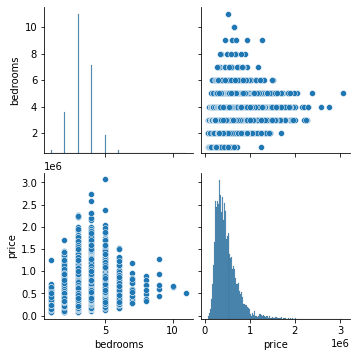

In [219]:
sns.pairplot(df.filter(['bedrooms','price']))

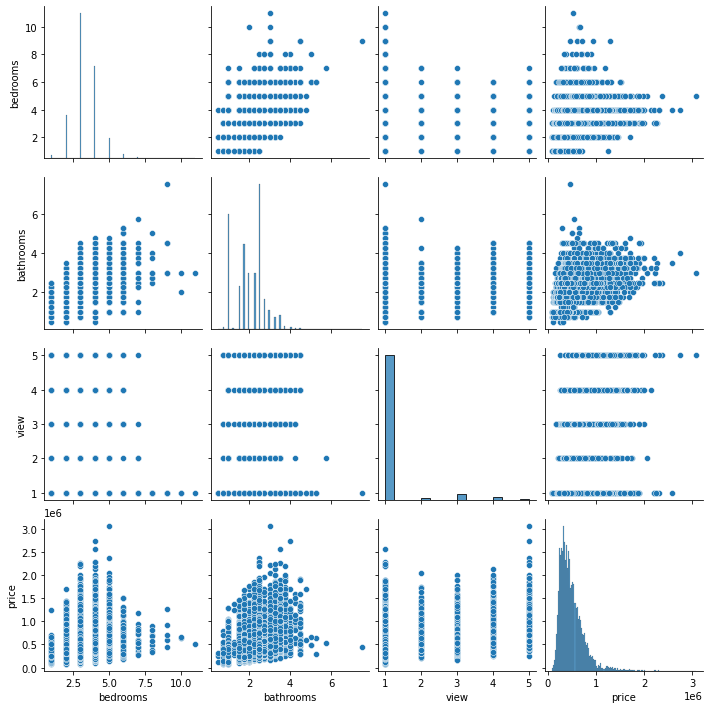

In [220]:
sns.pairplot(df_pairplotting1)

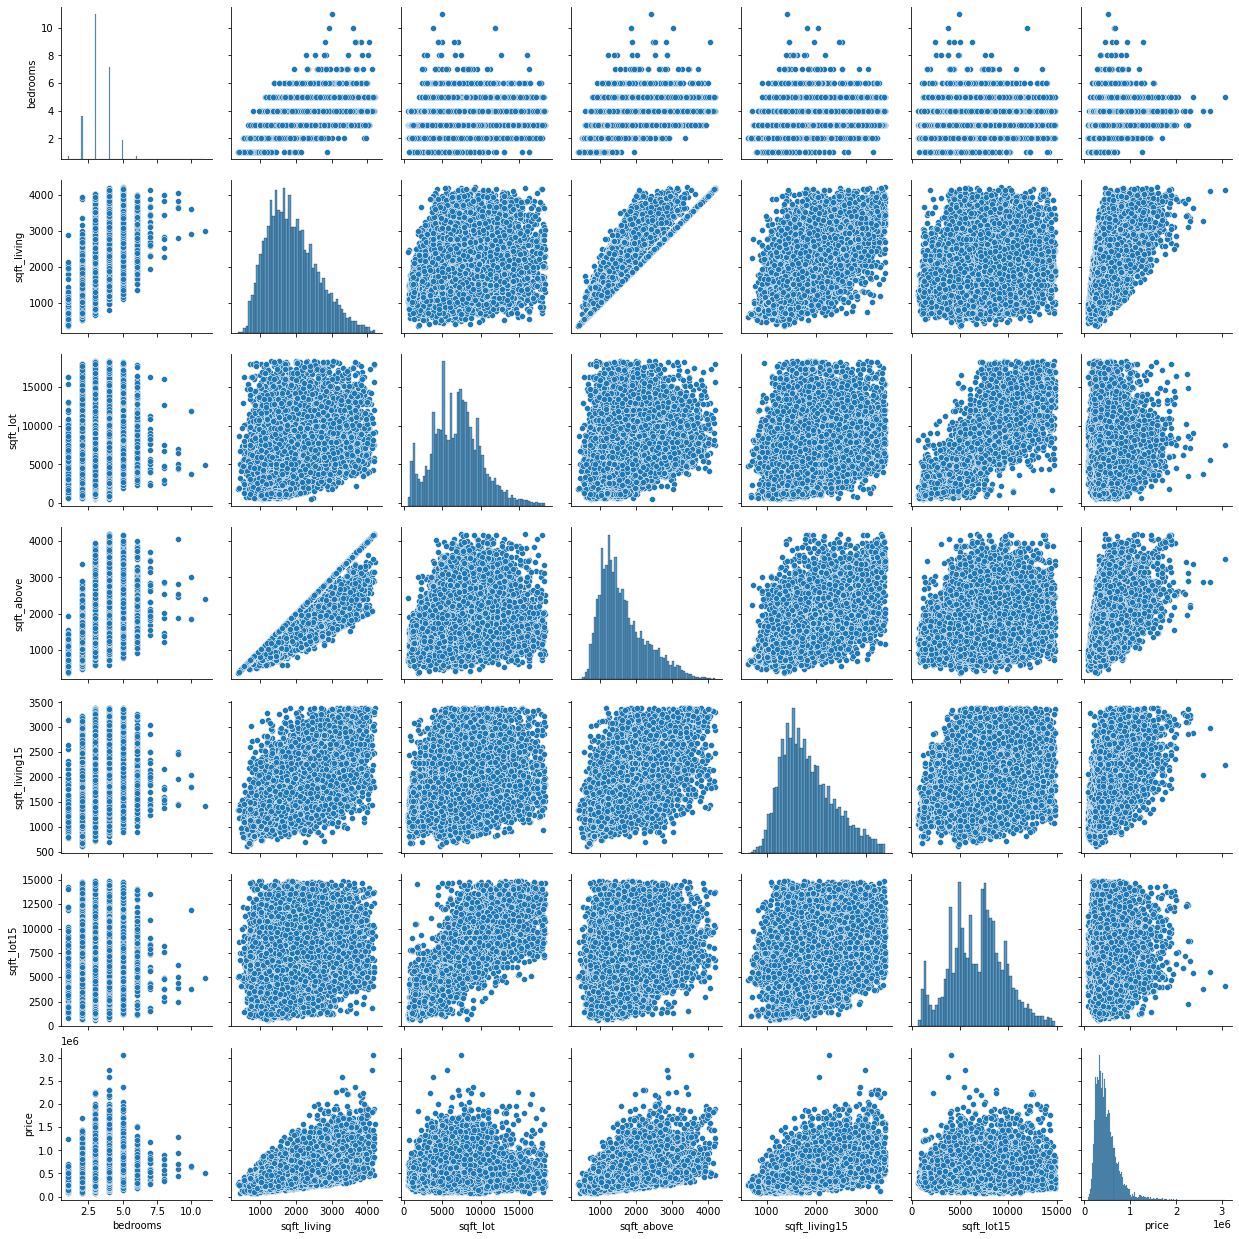

In [221]:
sns.pairplot(df_pairplotting2)